In [28]:
import pandas as pd
import numpy as np
data = pd.read_csv('company bankruptcy.csv')
data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [29]:
features = data.columns
features

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

### Finding important features related to our dataset


In [33]:
# calculate the correlation matrix
corr_matrix = data.corr()['Bankrupt?']
corr_matrix2 = data.corr()
print('Correlation Matrix:')
# print(corr_matrix[:20])
feature_imp_list = list(zip(features,corr_matrix))
feature_imp_list.sort(key=lambda x: x[1],reverse=True)
print(feature_imp_list[:30])
for i in range(1,25):
    print(feature_imp_list[i][0])


Correlation Matrix:
[('Bankrupt?', 1.0), (' Debt ratio %', 0.25016096206661775), (' Current Liability to Assets', 0.19449443585543952), (' Borrowing dependency', 0.1765429361615994), (' Current Liability to Current Assets', 0.17130604352180528), (' Liability to Equity', 0.16681209778111403), (' Current Liabilities/Equity', 0.1538283619069691), (' Current Liability to Equity', 0.1538283619069691), (' Liability-Assets Flag', 0.13921155938203358), (' Total expense/Assets', 0.13904921596620506), (' Equity to Long-term Liability', 0.139013572544475), (' Cash/Current Liability', 0.07792109615933365), (' Inventory and accounts receivable/Net value', 0.07527808207076636), (' Fixed Assets Turnover Frequency', 0.07281826419734336), (' Contingent liabilities/Net worth', 0.07045452479008069), (' Fixed Assets to Assets', 0.06632835494771087), (' Net Value Growth Rate', 0.06532942436840884), (' Revenue per person', 0.03971847652523984), (' Total assets to GNP price', 0.03510417888658876), (' Quick A

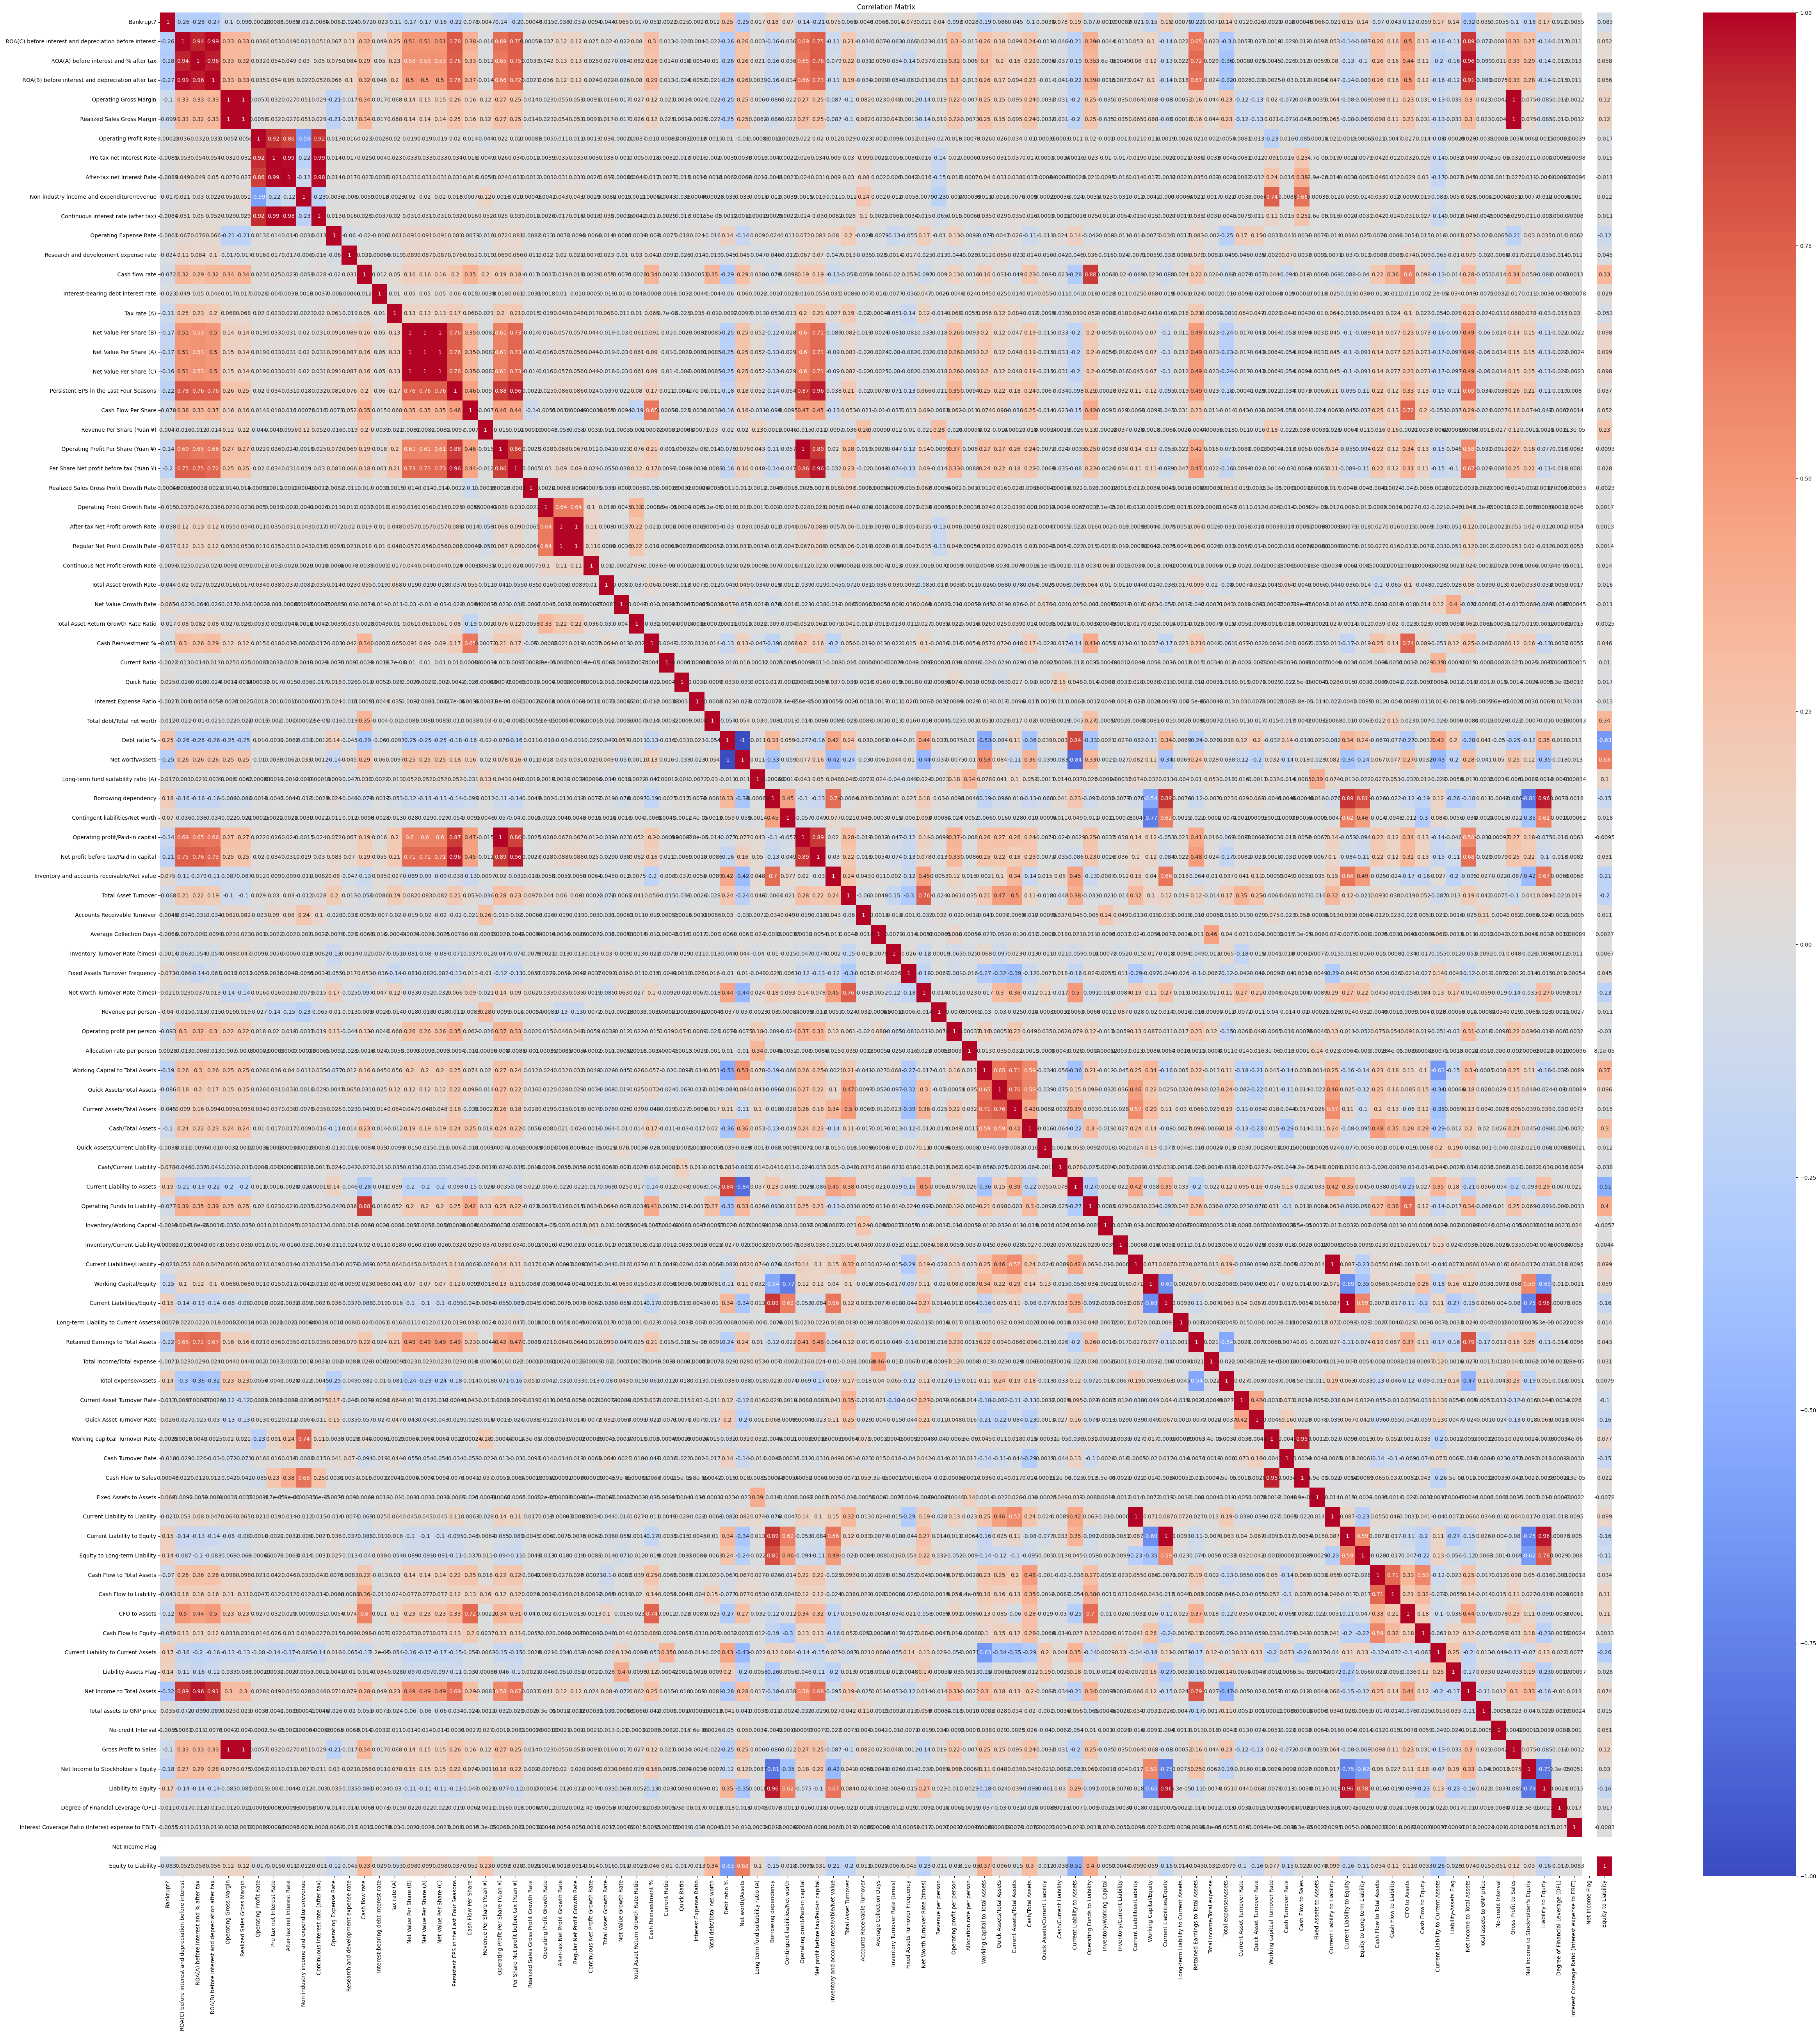

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(60,62))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### The most appropriate ratios to use will depend on the industry, market conditions, and other factors specific to the company being evaluated.

In [39]:
new_data = data[[' Gross Profit to Sales',' Net Income to Total Assets',' Operating Gross Margin',' Operating Profit Rate',' Operating Expense Rate',' Cash flow rate',' Continuous Net Profit Growth Rate',' Total Asset Growth Rate',' Net Value Growth Rate',' Cash Reinvestment %',' ROA(A) before interest and % after tax']]
new_data


Gross Profit to Sales   Net Income to Total Assets  \
0                   0.601453                     0.716845   
1                   0.610237                     0.795297   
2                   0.601449                     0.774670   
3                   0.583538                     0.739555   
4                   0.598782                     0.795016   
...                      ...                          ...   
6814                0.604455                     0.799927   
6815                0.598306                     0.799748   
6816                0.610441                     0.797778   
6817                0.607846                     0.811808   
6818                0.627408                     0.815956   

       Operating Gross Margin   Operating Profit Rate  \
0                    0.601457                0.998969   
1                    0.610235                0.998946   
2                    0.601450                0.998857   
3                    0.583541                0.998700   
4                    0.598783                0.998973   
...                       ...                     ...   
6814                 0.604455                0.998992   
6815                 0.598308                0.998992   
6816                 0.610444                0.998984   
6817                 0.607850                0.999074   
6818                 0.627409                0.998080   

       Operating Expense Rate   Cash flow rate  \
0                1.256969e-04         0.458143   
1                2.897851e-04         0.461867   
2                2.361297e-04         0.458521   
3                1.078888e-04         0.465705   
4                7.890000e+09         0.462746   
...                       ...              ...   
6814             1.510213e-04         0.463734   
6815             5.220000e+09         0.461978   
6816             2.509312e-04         0.472189   
6817             1.236154e-04         0.476123   
6818             1.431695e-03         0.427721   

       Continuous Net Profit Growth Rate   Total Asset Growth Rate  \
0                               0.217535              4.980000e+09   
1                               0.217620              6.110000e+09   
2                               0.217601              7.280000e+09   
3                               0.217568              4.880000e+09   
4                               0.217626              5.510000e+09   
...                                  ...                       ...   
6814                            0.217635              7.070000e+09   
6815                            0.217631              5.220000e+09   
6816                            0.217547              5.990000e+09   
6817                            0.218006              7.250000e+09   
6818                            0.217605              9.350000e+09   

       Net Value Growth Rate   Cash Reinvestment %  \
0                   0.000327              0.363725   
1                   0.000443              0.376709   
2                   0.000396              0.368913   
3                   0.000382              0.384077   
4                   0.000439              0.379690   
...                      ...                   ...   
6814                0.000450              0.380155   
6815                0.000445              0.377389   
6816                0.000435              0.379392   
6817                0.000529              0.401028   
6818                0.000519              0.360102   

       ROA(A) before interest and % after tax  
0                                    0.424389  
1                                    0.538214  
2                                    0.499019  
3                                    0.451265  
4                                    0.538432  
...                                       ...  
6814                                 0.539468  
6815                                 0.538269  
6816                                 0.533744  
6817              

In [ ]:
new_data.to_csv('model2_dataset.csv')
